In [1]:
import subprocess
from codecarbon import track_emissions

# Build C/C++ and Fortran executables
c_compiler = "gcc"
f_compiler = "gfortran"

print("C compiler details: \n")
command = c_compiler + " --version"
subprocess.run([command], shell=True)

print("\n")

print("Fortran compiler details: \n")
command = f_compiler + " --version"
subprocess.run([command], shell=True)

command = c_compiler + " ./code/nqueens.c -o nqueens_c.exe"
subprocess.run([command], shell=True)

command = f_compiler + " ./code/nqueens.f90 -o nqueens_f.exe"
subprocess.run([command], shell=True)            


#
# Set up carbon tracking demo functions. Note the code is run via the subprocess module, and as such as there
# is a computational overhead that will significantly skew results for short run times. You can ameliorate this,
# by running the same algoritm multiple times. Finally BEWARE the demo code provided as is writes to stdout, 
# and this can significantly skew the results if you are just interested "algorithm execute time". 
# 

project_name = "nqueens"
measure_power_secs = 5
country_iso_code = "GBR"
offline = True

@track_emissions(
    project_name = project_name,
    experiment_id="python_demo",
    output_file="python_demo.csv",
    measure_power_secs=measure_power_secs,
    country_iso_code=country_iso_code,
    offline=offline,
)
def python_demo_n_queens(size, repeats):
    command = "python ./code/nqueens.py --size {} --repeats {}".format(size, repeats) 
    subprocess.run([command], shell=True, capture_output=True, text=True)

@track_emissions(
    project_name = project_name,
    experiment_id="c_demo",
    output_file="c_demo.csv",
    measure_power_secs=measure_power_secs,
    country_iso_code=country_iso_code,
    offline=offline,
)
def c_demo_n_queens(size, repeats):
    command = "./nqueens_c.exe {} {}".format(size, repeats) 
    subprocess.run([command], shell=True, capture_output=True, text=True)

@track_emissions(
    project_name = project_name,
    experiment_id="fortran_demo",
    output_file="fortran_demo.csv",
    measure_power_secs=measure_power_secs,
    country_iso_code=country_iso_code,
    offline=offline,
)
def fortran_demo_n_queens(size, repeats):
    command = "./nqueens_f.exe {} {}".format(size, repeats) 
    subprocess.run([command], shell=True, capture_output=True, text=True)

C compiler details: 

Apple clang version 15.0.0 (clang-1500.3.9.4)
Target: arm64-apple-darwin23.6.0
Thread model: posix
InstalledDir: /Library/Developer/CommandLineTools/usr/bin


Fortran compiler details: 

GNU Fortran (Homebrew GCC 14.1.0_1) 14.1.0
Copyright (C) 2024 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Set up experimental run parameters. If you run this notebook for first time, you might want to
# modify the list and only run for small N.
experiments = [
    (12, 100),
    (13, 30),
    (14, 10),
    (15, 1),
]

In [3]:
for experiment in experiments:
    python_demo_n_queens(size=experiment[0], repeats=experiment[1])

[codecarbon INFO @ 08:29:30] offline tracker init
[codecarbon INFO @ 08:29:30] [setup] RAM Tracking...
[codecarbon INFO @ 08:29:30] [setup] GPU Tracking...
[codecarbon INFO @ 08:29:30] No GPU found.
[codecarbon INFO @ 08:29:30] [setup] CPU Tracking...


ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:29:31] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 08:29:31] >>> Tracker's metadata:
[codecarbon INFO @ 08:29:31]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 08:29:31]   Python version: 3.12.4
[codecarbon INFO @ 08:29:31]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 08:29:31]   Available RAM : 8.000 GB
[codecarbon INFO @ 08:29:31]   CPU count: 8
[codecarbon INFO @ 08:29:31]   CPU model: Apple M1
[codecarbon INFO @ 08:29:31]   GPU count: 1
[codecarbon INFO @ 08:29:31]   GPU model: Apple M1
[codecarbon INFO @ 08:29:31] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/python_demo.csv
[codecarbon INFO @ 08:29:36] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:29:38] Energy consumed for all CPUs : 0.000008 kWh. Total CPU Power : 5.707599999999999 W
[codecarbon INFO @ 08:29:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[co

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:30:18] Energy consumed for all CPUs : 0.000070 kWh. Total CPU Power : 5.740399999999999 W
[codecarbon INFO @ 08:30:21] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 08:30:21] Energy consumed for RAM : 0.000040 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:30:22] 0.000110 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:30:23] Energy consumed for all CPUs : 0.000076 kWh. Total CPU Power : 5.654400000000001 W
[codecarbon INFO @ 08:30:26] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:30:26] Energy consumed for RAM : 0.000044 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:30:27] 0.000120 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:30:28] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.669800000000001 W
[codecarbon INFO @ 08:30:31] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0057 W
[codeca

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:30:58] Energy consumed for all CPUs : 0.000122 kWh. Total CPU Power : 5.703 W
[codecarbon INFO @ 08:31:01] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 08:31:01] Energy consumed for RAM : 0.000068 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:31:02] 0.000190 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:31:03] Energy consumed for all CPUs : 0.000128 kWh. Total CPU Power : 5.6579 W
[codecarbon INFO @ 08:31:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.005699999999999999 W
[codecarbon INFO @ 08:31:06] Energy consumed for RAM : 0.000071 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:31:07] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:31:08] Energy consumed for all CPUs : 0.000135 kWh. Total CPU Power : 5.700100000000001 W
[codecarbon INFO @ 08:31:11] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029000000000000002 W


ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:31:38] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 5.691 W
[codecarbon INFO @ 08:31:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 08:31:41] Energy consumed for RAM : 0.000095 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:31:42] 0.000269 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:31:43] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 5.5991 W
[codecarbon INFO @ 08:31:46] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 08:31:46] Energy consumed for RAM : 0.000099 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:31:47] 0.000279 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:31:48] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 5.6925 W
[codecarbon INFO @ 08:31:51] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.009600000000000001 W
[codecarbon 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:32:18] Energy consumed for all CPUs : 0.000227 kWh. Total CPU Power : 5.695200000000001 W
[codecarbon INFO @ 08:32:21] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:32:21] Energy consumed for RAM : 0.000123 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:32:22] 0.000350 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:32:23] Energy consumed for all CPUs : 0.000233 kWh. Total CPU Power : 5.6996 W
[codecarbon INFO @ 08:32:26] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 08:32:26] Energy consumed for RAM : 0.000126 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:32:27] 0.000360 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:32:28] Energy consumed for all CPUs : 0.000240 kWh. Total CPU Power : 5.6654 W
[codecarbon INFO @ 08:32:31] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 08:32:31]

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:32:58] Energy consumed for all CPUs : 0.000279 kWh. Total CPU Power : 5.6919 W
[codecarbon INFO @ 08:33:01] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:33:01] Energy consumed for RAM : 0.000151 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:33:02] 0.000429 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:33:03] Energy consumed for all CPUs : 0.000285 kWh. Total CPU Power : 5.638300000000001 W
[codecarbon INFO @ 08:33:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:33:06] Energy consumed for RAM : 0.000154 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:33:07] 0.000439 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:33:08] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 5.5957 W
[codecarbon INFO @ 08:33:11] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.009600000000000001 W
[codecarbon INFO @ 08:33:11] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:33:38] Energy consumed for all CPUs : 0.000331 kWh. Total CPU Power : 5.6644 W
[codecarbon INFO @ 08:33:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:33:41] Energy consumed for RAM : 0.000178 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:33:42] 0.000509 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:33:43] Energy consumed for all CPUs : 0.000337 kWh. Total CPU Power : 5.653499999999999 W
[codecarbon INFO @ 08:33:46] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 08:33:46] Energy consumed for RAM : 0.000182 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:33:47] 0.000519 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:33:48] Energy consumed for all CPUs : 0.000344 kWh. Total CPU Power : 5.594999999999999 W
[codecarbon INFO @ 08:33:51] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:34:08] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 08:34:08] >>> Tracker's metadata:
[codecarbon INFO @ 08:34:08]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 08:34:08]   Python version: 3.12.4
[codecarbon INFO @ 08:34:08]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 08:34:08]   Available RAM : 8.000 GB
[codecarbon INFO @ 08:34:08]   CPU count: 8
[codecarbon INFO @ 08:34:08]   CPU model: Apple M1
[codecarbon INFO @ 08:34:08]   GPU count: 1
[codecarbon INFO @ 08:34:08]   GPU model: Apple M1
[codecarbon INFO @ 08:34:08] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/python_demo.csv
[codecarbon INFO @ 08:34:13] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:34:14] Energy consumed for all CPUs : 0.000008 kWh. Total CPU Power : 5.6725 W
[codecarbon INFO @ 08:34:17] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon IN

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:34:54] Energy consumed for all CPUs : 0.000070 kWh. Total CPU Power : 5.7536000000000005 W
[codecarbon INFO @ 08:34:57] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0142 W
[codecarbon INFO @ 08:34:58] Energy consumed for RAM : 0.000040 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:34:59] 0.000110 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:34:59] Energy consumed for all CPUs : 0.000076 kWh. Total CPU Power : 5.6213999999999995 W
[codecarbon INFO @ 08:35:02] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:35:03] Energy consumed for RAM : 0.000044 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:35:04] 0.000120 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:35:04] Energy consumed for all CPUs : 0.000082 kWh. Total CPU Power : 5.6838999999999995 W
[codecarbon INFO @ 08:35:07] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:35:35] Energy consumed for all CPUs : 0.000122 kWh. Total CPU Power : 5.7056 W
[codecarbon INFO @ 08:35:37] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:35:38] Energy consumed for RAM : 0.000067 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:35:39] 0.000190 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:35:40] Energy consumed for all CPUs : 0.000129 kWh. Total CPU Power : 5.7126 W
[codecarbon INFO @ 08:35:42] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 08:35:43] Energy consumed for RAM : 0.000071 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:35:44] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:35:45] Energy consumed for all CPUs : 0.000135 kWh. Total CPU Power : 5.6381 W
[codecarbon INFO @ 08:35:47] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0095 W
[codecarbon INFO @ 08:35:48] Energy con

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:36:15] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 5.996900000000001 W
[codecarbon INFO @ 08:36:18] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 08:36:18] Energy consumed for RAM : 0.000095 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:36:19] 0.000269 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:36:20] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 5.690900000000001 W
[codecarbon INFO @ 08:36:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.001 W
[codecarbon INFO @ 08:36:23] Energy consumed for RAM : 0.000098 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:36:24] 0.000279 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:36:25] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 5.7401 W
[codecarbon INFO @ 08:36:28] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.005699999999999999 W
[codecarbon INFO @ 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:36:55] Energy consumed for all CPUs : 0.000226 kWh. Total CPU Power : 5.7231 W
[codecarbon INFO @ 08:36:58] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.010400000000000001 W
[codecarbon INFO @ 08:36:58] Energy consumed for RAM : 0.000122 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:36:59] 0.000349 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:37:00] Energy consumed for all CPUs : 0.000233 kWh. Total CPU Power : 5.7345 W
[codecarbon INFO @ 08:37:03] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0047 W
[codecarbon INFO @ 08:37:03] Energy consumed for RAM : 0.000126 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:37:04] 0.000359 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:37:05] Energy consumed for all CPUs : 0.000240 kWh. Total CPU Power : 5.6847 W
[codecarbon INFO @ 08:37:08] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.005699999999999999 W
[codecarbon INFO @ 08:37:0

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:37:35] Energy consumed for all CPUs : 0.000279 kWh. Total CPU Power : 5.7052 W
[codecarbon INFO @ 08:37:38] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0095 W
[codecarbon INFO @ 08:37:38] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:37:39] 0.000429 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:37:40] Energy consumed for all CPUs : 0.000285 kWh. Total CPU Power : 5.692 W
[codecarbon INFO @ 08:37:43] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0057 W
[codecarbon INFO @ 08:37:43] Energy consumed for RAM : 0.000153 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:37:44] 0.000439 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:37:45] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 5.737699999999999 W
[codecarbon INFO @ 08:37:48] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 08:37:48] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:38:15] Energy consumed for all CPUs : 0.000331 kWh. Total CPU Power : 5.7095 W
[codecarbon INFO @ 08:38:18] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0047 W
[codecarbon INFO @ 08:38:18] Energy consumed for RAM : 0.000177 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:38:19] 0.000509 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:38:20] Energy consumed for all CPUs : 0.000338 kWh. Total CPU Power : 5.6944 W
[codecarbon INFO @ 08:38:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.010499999999999999 W
[codecarbon INFO @ 08:38:23] Energy consumed for RAM : 0.000181 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:38:24] 0.000519 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:38:25] Energy consumed for all CPUs : 0.000344 kWh. Total CPU Power : 5.6973 W
[codecarbon INFO @ 08:38:28] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.010400000000000001 W
[codecarbon INFO @ 08:38:2

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:38:55] Energy consumed for all CPUs : 0.000384 kWh. Total CPU Power : 5.7661 W
[codecarbon INFO @ 08:38:58] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.008499999999999999 W
[codecarbon INFO @ 08:38:58] Energy consumed for RAM : 0.000205 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:38:59] 0.000588 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:00] Energy consumed for all CPUs : 0.000390 kWh. Total CPU Power : 5.7063999999999995 W
[codecarbon INFO @ 08:39:03] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 08:39:03] Energy consumed for RAM : 0.000208 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:39:04] 0.000598 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:05] Energy consumed for all CPUs : 0.000397 kWh. Total CPU Power : 5.789 W
[codecarbon INFO @ 08:39:08] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0047 W
[codecarbon INFO @ 08:39:08] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:39:35] Energy consumed for all CPUs : 0.000436 kWh. Total CPU Power : 5.722900000000001 W
[codecarbon INFO @ 08:39:38] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0066 W
[codecarbon INFO @ 08:39:39] Energy consumed for RAM : 0.000232 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:39:39] 0.000668 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:40] Energy consumed for all CPUs : 0.000442 kWh. Total CPU Power : 5.7101 W
[codecarbon INFO @ 08:39:43] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 08:39:44] Energy consumed for RAM : 0.000236 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:39:44] 0.000678 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:45] Energy consumed for all CPUs : 0.000449 kWh. Total CPU Power : 5.760800000000001 W
[codecarbon INFO @ 08:39:48] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.007500000000000001 W
[codecarbon INFO @

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:40:15] Energy consumed for all CPUs : 0.000489 kWh. Total CPU Power : 5.648300000000001 W
[codecarbon INFO @ 08:40:18] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.011399999999999999 W
[codecarbon INFO @ 08:40:19] Energy consumed for RAM : 0.000260 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:40:19] 0.000749 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:40:20] Energy consumed for all CPUs : 0.000495 kWh. Total CPU Power : 5.6672 W
[codecarbon INFO @ 08:40:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 08:40:24] Energy consumed for RAM : 0.000263 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:40:25] 0.000758 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:40:25] Energy consumed for all CPUs : 0.000502 kWh. Total CPU Power : 5.6913 W
[codecarbon INFO @ 08:40:28] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:40:29] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:40:55] Energy consumed for all CPUs : 0.000541 kWh. Total CPU Power : 5.75 W
[codecarbon INFO @ 08:40:58] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.006500000000000001 W
[codecarbon INFO @ 08:40:59] Energy consumed for RAM : 0.000287 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:41:00] 0.000829 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:41:00] Energy consumed for all CPUs : 0.000548 kWh. Total CPU Power : 5.6449 W
[codecarbon INFO @ 08:41:03] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:41:04] Energy consumed for RAM : 0.000290 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:41:05] 0.000839 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:41:05] Energy consumed for all CPUs : 0.000554 kWh. Total CPU Power : 5.6709 W
[codecarbon INFO @ 08:41:08] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.008500000000000002 W
[codecarbon INFO @ 08:41:09]

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:41:35] Energy consumed for all CPUs : 0.000593 kWh. Total CPU Power : 5.7198 W
[codecarbon INFO @ 08:41:38] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.008499999999999999 W
[codecarbon INFO @ 08:41:39] Energy consumed for RAM : 0.000314 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:41:40] 0.000908 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:41:40] Energy consumed for all CPUs : 0.000600 kWh. Total CPU Power : 5.646799999999999 W
[codecarbon INFO @ 08:41:43] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0028 W
[codecarbon INFO @ 08:41:44] Energy consumed for RAM : 0.000318 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:41:45] 0.000918 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:41:45] Energy consumed for all CPUs : 0.000607 kWh. Total CPU Power : 5.7492 W
[codecarbon INFO @ 08:41:48] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0095 W
[codecarbon INFO @ 08:41:49] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:42:15] Energy consumed for all CPUs : 0.000645 kWh. Total CPU Power : 5.6614 W
[codecarbon INFO @ 08:42:18] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.008500000000000002 W
[codecarbon INFO @ 08:42:19] Energy consumed for RAM : 0.000342 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:42:20] 0.000988 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:42:20] Energy consumed for all CPUs : 0.000652 kWh. Total CPU Power : 5.6926 W
[codecarbon INFO @ 08:42:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 08:42:24] Energy consumed for RAM : 0.000345 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:42:25] 0.000998 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:42:25] Energy consumed for all CPUs : 0.000659 kWh. Total CPU Power : 5.7135 W
[codecarbon INFO @ 08:42:28] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0047 W
[codecarbon INFO @ 08:42:29] Energy cons

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:42:48] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 08:42:49] >>> Tracker's metadata:
[codecarbon INFO @ 08:42:49]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 08:42:49]   Python version: 3.12.4
[codecarbon INFO @ 08:42:49]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 08:42:49]   Available RAM : 8.000 GB
[codecarbon INFO @ 08:42:49]   CPU count: 8
[codecarbon INFO @ 08:42:49]   CPU model: Apple M1
[codecarbon INFO @ 08:42:49]   GPU count: 1
[codecarbon INFO @ 08:42:49]   GPU model: Apple M1
[codecarbon INFO @ 08:42:49] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/python_demo.csv
[codecarbon INFO @ 08:42:54] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:42:55] Energy consumed for all CPUs : 0.000008 kWh. Total CPU Power : 5.664600000000001 W
[codecarbon INFO @ 08:42:58] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[co

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:43:35] Energy consumed for all CPUs : 0.000075 kWh. Total CPU Power : 5.728 W
[codecarbon INFO @ 08:43:38] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 08:43:39] Energy consumed for RAM : 0.000040 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:43:40] 0.000115 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:43:40] Energy consumed for all CPUs : 0.000081 kWh. Total CPU Power : 5.717499999999999 W
[codecarbon INFO @ 08:43:43] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 08:43:44] Energy consumed for RAM : 0.000043 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:43:45] 0.000125 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:43:45] Energy consumed for all CPUs : 0.000088 kWh. Total CPU Power : 5.684200000000001 W
[codecarbon INFO @ 08:43:48] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 08:43:49] Ener

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:44:15] Energy consumed for all CPUs : 0.000127 kWh. Total CPU Power : 5.726999999999999 W
[codecarbon INFO @ 08:44:18] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 08:44:19] Energy consumed for RAM : 0.000067 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:44:20] 0.000195 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:44:20] Energy consumed for all CPUs : 0.000134 kWh. Total CPU Power : 5.7232 W
[codecarbon INFO @ 08:44:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 08:44:24] Energy consumed for RAM : 0.000071 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:44:25] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:44:25] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 5.705 W
[codecarbon INFO @ 08:44:28] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon IN

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:52:58] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 6.411199999999999 W
[codecarbon INFO @ 08:53:01] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0697 W
[codecarbon INFO @ 08:53:01] Energy consumed for RAM : 0.000095 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:53:02] 0.000276 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:53:03] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 5.863200000000001 W
[codecarbon INFO @ 08:53:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0497 W
[codecarbon INFO @ 08:53:06] Energy consumed for RAM : 0.000098 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:53:07] 0.000286 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:53:08] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 5.9046 W
[codecarbon INFO @ 08:53:11] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0087 W
[codecarbon INFO @ 08:53:11] Ene

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:53:38] Energy consumed for all CPUs : 0.000234 kWh. Total CPU Power : 5.6944 W
[codecarbon INFO @ 08:53:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0115 W
[codecarbon INFO @ 08:53:41] Energy consumed for RAM : 0.000122 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:53:42] 0.000357 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:53:43] Energy consumed for all CPUs : 0.000241 kWh. Total CPU Power : 5.673900000000001 W
[codecarbon INFO @ 08:53:46] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0134 W
[codecarbon INFO @ 08:53:46] Energy consumed for RAM : 0.000126 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:53:47] 0.000367 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:53:48] Energy consumed for all CPUs : 0.000247 kWh. Total CPU Power : 5.693299999999999 W
[codecarbon INFO @ 08:53:51] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 08:53:51] Ene

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:54:18] Energy consumed for all CPUs : 0.000287 kWh. Total CPU Power : 5.7188 W
[codecarbon INFO @ 08:54:21] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.010600000000000002 W
[codecarbon INFO @ 08:54:21] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:54:22] 0.000437 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:54:23] Energy consumed for all CPUs : 0.000294 kWh. Total CPU Power : 5.6894 W
[codecarbon INFO @ 08:54:26] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 08:54:26] Energy consumed for RAM : 0.000153 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:54:27] 0.000447 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:54:28] Energy consumed for all CPUs : 0.000300 kWh. Total CPU Power : 5.6533999999999995 W
[codecarbon INFO @ 08:54:31] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:54:31]

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:54:58] Energy consumed for all CPUs : 0.000340 kWh. Total CPU Power : 5.740500000000001 W
[codecarbon INFO @ 08:55:01] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 08:55:01] Energy consumed for RAM : 0.000178 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:55:02] 0.000517 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:03] Energy consumed for all CPUs : 0.000346 kWh. Total CPU Power : 5.6947 W
[codecarbon INFO @ 08:55:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 08:55:06] Energy consumed for RAM : 0.000181 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:55:07] 0.000527 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:08] Energy consumed for all CPUs : 0.000353 kWh. Total CPU Power : 5.6989 W
[codecarbon INFO @ 08:55:11] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.008700000000000001 W

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:55:38] Energy consumed for all CPUs : 0.000392 kWh. Total CPU Power : 5.7008 W
[codecarbon INFO @ 08:55:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:55:41] Energy consumed for RAM : 0.000205 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:55:42] 0.000598 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:43] Energy consumed for all CPUs : 0.000399 kWh. Total CPU Power : 5.720700000000001 W
[codecarbon INFO @ 08:55:46] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.014400000000000001 W
[codecarbon INFO @ 08:55:46] Energy consumed for RAM : 0.000209 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:55:47] 0.000608 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:48] Energy consumed for all CPUs : 0.000405 kWh. Total CPU Power : 5.695 W
[codecarbon INFO @ 08:55:51] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INF

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:56:18] Energy consumed for all CPUs : 0.000445 kWh. Total CPU Power : 5.7273000000000005 W
[codecarbon INFO @ 08:56:21] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029 W
[codecarbon INFO @ 08:56:21] Energy consumed for RAM : 0.000233 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:56:22] 0.000678 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:56:23] Energy consumed for all CPUs : 0.000451 kWh. Total CPU Power : 5.6508 W
[codecarbon INFO @ 08:56:26] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0115 W
[codecarbon INFO @ 08:56:26] Energy consumed for RAM : 0.000236 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:56:27] 0.000688 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:56:28] Energy consumed for all CPUs : 0.000458 kWh. Total CPU Power : 5.7040999999999995 W
[codecarbon INFO @ 08:56:31] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 08:56:31] E

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:56:58] Energy consumed for all CPUs : 0.000497 kWh. Total CPU Power : 5.7383 W
[codecarbon INFO @ 08:57:01] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029 W
[codecarbon INFO @ 08:57:01] Energy consumed for RAM : 0.000261 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:57:02] 0.000759 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:57:03] Energy consumed for all CPUs : 0.000504 kWh. Total CPU Power : 5.6450000000000005 W
[codecarbon INFO @ 08:57:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0134 W
[codecarbon INFO @ 08:57:06] Energy consumed for RAM : 0.000264 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:57:07] 0.000769 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:57:08] Energy consumed for all CPUs : 0.000511 kWh. Total CPU Power : 5.6614 W
[codecarbon INFO @ 08:57:11] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0057 W
[codecarbon INFO @ 08:57:11] Energy consum

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:57:38] Energy consumed for all CPUs : 0.000550 kWh. Total CPU Power : 5.7112 W
[codecarbon INFO @ 08:57:41] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 08:57:41] Energy consumed for RAM : 0.000288 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:57:42] 0.000839 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:57:43] Energy consumed for all CPUs : 0.000557 kWh. Total CPU Power : 5.6971 W
[codecarbon INFO @ 08:57:46] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.009600000000000001 W
[codecarbon INFO @ 08:57:46] Energy consumed for RAM : 0.000292 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:57:47] 0.000849 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:57:48] Energy consumed for all CPUs : 0.000563 kWh. Total CPU Power : 5.7141 W
[codecarbon INFO @ 08:57:51] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 08:57:

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:58:18] Energy consumed for all CPUs : 0.000604 kWh. Total CPU Power : 6.984399999999999 W
[codecarbon INFO @ 08:58:21] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 08:58:22] Energy consumed for RAM : 0.000316 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:58:22] 0.000920 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:58:23] Energy consumed for all CPUs : 0.000611 kWh. Total CPU Power : 6.443600000000001 W
[codecarbon INFO @ 08:58:26] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.029699999999999997 W
[codecarbon INFO @ 08:58:27] Energy consumed for RAM : 0.000319 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:58:27] 0.000931 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:58:28] Energy consumed for all CPUs : 0.000618 kWh. Total CPU Power : 5.7501999999999995 W
[codecarbon INFO @ 08:58:31] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0056999999999

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:58:58] Energy consumed for all CPUs : 0.000657 kWh. Total CPU Power : 5.6966 W
[codecarbon INFO @ 08:59:01] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.005699999999999999 W
[codecarbon INFO @ 08:59:02] Energy consumed for RAM : 0.000344 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:59:02] 0.001001 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:59:03] Energy consumed for all CPUs : 0.000663 kWh. Total CPU Power : 5.6383 W
[codecarbon INFO @ 08:59:06] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 08:59:07] Energy consumed for RAM : 0.000347 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:59:07] 0.001011 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:59:08] Energy consumed for all CPUs : 0.000670 kWh. Total CPU Power : 5.6658 W
[codecarbon INFO @ 08:59:11] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 08:59:1

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 08:59:38] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 5.6988 W
[codecarbon INFO @ 08:59:41] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 08:59:42] Energy consumed for RAM : 0.000371 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:59:42] 0.001081 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:59:43] Energy consumed for all CPUs : 0.000716 kWh. Total CPU Power : 5.662799999999999 W
[codecarbon INFO @ 08:59:46] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 08:59:47] Energy consumed for RAM : 0.000375 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 08:59:47] 0.001091 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:59:48] Energy consumed for all CPUs : 0.000722 kWh. Total CPU Power : 5.6413 W
[codecarbon INFO @ 08:59:51] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0115 W
[codecarbon INFO @ 08:59:52] Energy consume

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:00:18] Energy consumed for all CPUs : 0.000765 kWh. Total CPU Power : 5.9357999999999995 W
[codecarbon INFO @ 09:00:21] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.07540000000000002 W
[codecarbon INFO @ 09:00:22] Energy consumed for RAM : 0.000399 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:00:23] 0.001165 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:00:23] Energy consumed for all CPUs : 0.000772 kWh. Total CPU Power : 5.776199999999999 W
[codecarbon INFO @ 09:00:26] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 09:00:27] Energy consumed for RAM : 0.000402 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:00:28] 0.001175 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:00:28] Energy consumed for all CPUs : 0.000779 kWh. Total CPU Power : 5.6789 W
[codecarbon INFO @ 09:00:31] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[co

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:00:58] Energy consumed for all CPUs : 0.000819 kWh. Total CPU Power : 5.7120999999999995 W
[codecarbon INFO @ 09:01:01] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 09:01:02] Energy consumed for RAM : 0.000427 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:01:03] 0.001246 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:03] Energy consumed for all CPUs : 0.000826 kWh. Total CPU Power : 6.206999999999999 W
[codecarbon INFO @ 09:01:06] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0124 W
[codecarbon INFO @ 09:01:07] Energy consumed for RAM : 0.000430 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:01:08] 0.001256 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:08] Energy consumed for all CPUs : 0.000832 kWh. Total CPU Power : 5.669100000000001 W
[codecarbon INFO @ 09:01:11] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0056999999999

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:01:38] Energy consumed for all CPUs : 0.000872 kWh. Total CPU Power : 5.9902999999999995 W
[codecarbon INFO @ 09:01:41] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0125 W
[codecarbon INFO @ 09:01:42] Energy consumed for RAM : 0.000454 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:01:43] 0.001327 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:43] Energy consumed for all CPUs : 0.000879 kWh. Total CPU Power : 5.6915 W
[codecarbon INFO @ 09:01:46] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:01:47] Energy consumed for RAM : 0.000457 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:01:48] 0.001337 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:48] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 5.7204999999999995 W
[codecarbon INFO @ 09:01:51] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:02:18] Energy consumed for all CPUs : 0.000925 kWh. Total CPU Power : 5.7089 W
[codecarbon INFO @ 09:02:21] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 09:02:22] Energy consumed for RAM : 0.000482 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:02:23] 0.001407 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:02:23] Energy consumed for all CPUs : 0.000931 kWh. Total CPU Power : 5.7521 W
[codecarbon INFO @ 09:02:26] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0917 W
[codecarbon INFO @ 09:02:27] Energy consumed for RAM : 0.000485 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:02:28] 0.001417 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:02:28] Energy consumed for all CPUs : 0.000938 kWh. Total CPU Power : 5.9708 W
[codecarbon INFO @ 09:02:31] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.005699999999999999 W
[codecarbon INFO @ 09:02:32] Energy cons

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:02:58] Energy consumed for all CPUs : 0.000978 kWh. Total CPU Power : 5.7255 W
[codecarbon INFO @ 09:03:01] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.008700000000000001 W
[codecarbon INFO @ 09:03:02] Energy consumed for RAM : 0.000509 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:03:03] 0.001488 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:03:03] Energy consumed for all CPUs : 0.000984 kWh. Total CPU Power : 5.6588 W
[codecarbon INFO @ 09:03:06] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.010499999999999999 W
[codecarbon INFO @ 09:03:07] Energy consumed for RAM : 0.000513 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:03:08] 0.001498 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:03:08] Energy consumed for all CPUs : 0.000991 kWh. Total CPU Power : 5.695399999999999 W
[codecarbon INFO @ 09:03:11] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.005699999999999999 W
[

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:03:38] Energy consumed for all CPUs : 0.001030 kWh. Total CPU Power : 5.745400000000001 W
[codecarbon INFO @ 09:03:41] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0057 W
[codecarbon INFO @ 09:03:42] Energy consumed for RAM : 0.000537 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:03:43] 0.001568 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:03:43] Energy consumed for all CPUs : 0.001037 kWh. Total CPU Power : 5.6767 W
[codecarbon INFO @ 09:03:46] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:03:47] Energy consumed for RAM : 0.000540 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:03:48] 0.001578 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:03:48] Energy consumed for all CPUs : 0.001043 kWh. Total CPU Power : 5.6471 W
[codecarbon INFO @ 09:03:51] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon IN

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:04:18] Energy consumed for all CPUs : 0.001083 kWh. Total CPU Power : 5.735000000000001 W
[codecarbon INFO @ 09:04:21] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 09:04:22] Energy consumed for RAM : 0.000565 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:04:23] 0.001648 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:04:23] Energy consumed for all CPUs : 0.001089 kWh. Total CPU Power : 5.6893 W
[codecarbon INFO @ 09:04:26] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:04:27] Energy consumed for RAM : 0.000568 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:04:28] 0.001658 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:04:28] Energy consumed for all CPUs : 0.001096 kWh. Total CPU Power : 5.722499999999999 W
[codecarbon INFO @ 09:04:31] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0029000000000000002 W
[co

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:04:58] Energy consumed for all CPUs : 0.001136 kWh. Total CPU Power : 5.733899999999999 W
[codecarbon INFO @ 09:05:01] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 09:05:02] Energy consumed for RAM : 0.000592 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:05:03] 0.001729 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:05:03] Energy consumed for all CPUs : 0.001142 kWh. Total CPU Power : 5.6847 W
[codecarbon INFO @ 09:05:06] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0134 W
[codecarbon INFO @ 09:05:07] Energy consumed for RAM : 0.000596 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:05:08] 0.001739 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:05:08] Energy consumed for all CPUs : 0.001149 kWh. Total CPU Power : 5.7151 W
[codecarbon INFO @ 09:05:11] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon I

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:05:38] Energy consumed for all CPUs : 0.001189 kWh. Total CPU Power : 5.6896 W
[codecarbon INFO @ 09:05:41] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:05:42] Energy consumed for RAM : 0.000620 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:05:43] 0.001810 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:05:43] Energy consumed for all CPUs : 0.001195 kWh. Total CPU Power : 5.7431 W
[codecarbon INFO @ 09:05:46] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 09:05:47] Energy consumed for RAM : 0.000623 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:05:48] 0.001820 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:05:48] Energy consumed for all CPUs : 0.001202 kWh. Total CPU Power : 5.7101 W
[codecarbon INFO @ 09:05:51] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 09:05:52] Energy con

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:06:18] Energy consumed for all CPUs : 0.001241 kWh. Total CPU Power : 5.7089 W
[codecarbon INFO @ 09:06:21] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:06:22] Energy consumed for RAM : 0.000648 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:06:23] 0.001890 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:06:23] Energy consumed for all CPUs : 0.001248 kWh. Total CPU Power : 5.696 W
[codecarbon INFO @ 09:06:26] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 09:06:27] Energy consumed for RAM : 0.000651 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:06:28] 0.001900 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:06:28] Energy consumed for all CPUs : 0.001254 kWh. Total CPU Power : 5.6962 W
[codecarbon INFO @ 09:06:31] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:06:

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:06:59] Energy consumed for all CPUs : 0.001294 kWh. Total CPU Power : 5.6944 W
[codecarbon INFO @ 09:07:01] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0058000000000000005 W
[codecarbon INFO @ 09:07:02] Energy consumed for RAM : 0.000675 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:07:03] 0.001970 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:07:04] Energy consumed for all CPUs : 0.001300 kWh. Total CPU Power : 5.6441 W
[codecarbon INFO @ 09:07:06] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0134 W
[codecarbon INFO @ 09:07:07] Energy consumed for RAM : 0.000679 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:07:08] 0.001980 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:07:09] Energy consumed for all CPUs : 0.001307 kWh. Total CPU Power : 5.7511 W
[codecarbon INFO @ 09:07:11] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:07:12] Energy con

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:07:39] Energy consumed for all CPUs : 0.001346 kWh. Total CPU Power : 5.728 W
[codecarbon INFO @ 09:07:42] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0057 W
[codecarbon INFO @ 09:07:42] Energy consumed for RAM : 0.000703 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:07:43] 0.002050 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:07:44] Energy consumed for all CPUs : 0.001353 kWh. Total CPU Power : 5.7214 W
[codecarbon INFO @ 09:07:47] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 09:07:47] Energy consumed for RAM : 0.000706 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:07:48] 0.002060 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:07:49] Energy consumed for all CPUs : 0.001359 kWh. Total CPU Power : 5.711599999999999 W
[codecarbon INFO @ 09:07:52] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 09:07:52] Energy consumed

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:08:19] Energy consumed for all CPUs : 0.001399 kWh. Total CPU Power : 5.705900000000001 W
[codecarbon INFO @ 09:08:22] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:08:22] Energy consumed for RAM : 0.000730 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:08:23] 0.002130 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:08:24] Energy consumed for all CPUs : 0.001405 kWh. Total CPU Power : 5.7215 W
[codecarbon INFO @ 09:08:27] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0104 W
[codecarbon INFO @ 09:08:27] Energy consumed for RAM : 0.000734 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:08:28] 0.002140 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:08:29] Energy consumed for all CPUs : 0.001412 kWh. Total CPU Power : 5.6977 W
[codecarbon INFO @ 09:08:32] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:08:32] Energy consume

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:08:59] Energy consumed for all CPUs : 0.001451 kWh. Total CPU Power : 5.7490000000000006 W
[codecarbon INFO @ 09:09:02] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0047 W
[codecarbon INFO @ 09:09:02] Energy consumed for RAM : 0.000758 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:09:03] 0.002210 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:04] Energy consumed for all CPUs : 0.001457 kWh. Total CPU Power : 5.665 W
[codecarbon INFO @ 09:09:07] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.013300000000000001 W
[codecarbon INFO @ 09:09:07] Energy consumed for RAM : 0.000761 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:09:08] 0.002220 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:09] Energy consumed for all CPUs : 0.001464 kWh. Total CPU Power : 5.694200000000001 W
[codecarbon INFO @ 09:09:12] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:09:39] Energy consumed for all CPUs : 0.001503 kWh. Total CPU Power : 5.7263 W
[codecarbon INFO @ 09:09:42] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:09:42] Energy consumed for RAM : 0.000785 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:09:43] 0.002290 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:44] Energy consumed for all CPUs : 0.001509 kWh. Total CPU Power : 5.662000000000001 W
[codecarbon INFO @ 09:09:47] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0152 W
[codecarbon INFO @ 09:09:47] Energy consumed for RAM : 0.000789 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:09:48] 0.002299 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:49] Energy consumed for all CPUs : 0.001516 kWh. Total CPU Power : 5.643 W
[codecarbon INFO @ 09:09:52] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:09:52] Energy consumed

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:10:09] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:10:10] >>> Tracker's metadata:
[codecarbon INFO @ 09:10:10]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:10:10]   Python version: 3.12.4
[codecarbon INFO @ 09:10:10]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:10:10]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:10:10]   CPU count: 8
[codecarbon INFO @ 09:10:10]   CPU model: Apple M1
[codecarbon INFO @ 09:10:10]   GPU count: 1
[codecarbon INFO @ 09:10:10]   GPU model: Apple M1
[codecarbon INFO @ 09:10:10] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/python_demo.csv
[codecarbon INFO @ 09:10:15] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:10:16] Energy consumed for all CPUs : 0.000008 kWh. Total CPU Power : 5.565500000000001 W
[codecarbon INFO @ 09:10:19] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0066 W
[co

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:10:56] Energy consumed for all CPUs : 0.000069 kWh. Total CPU Power : 5.708 W
[codecarbon INFO @ 09:10:59] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0076 W
[codecarbon INFO @ 09:11:00] Energy consumed for RAM : 0.000040 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:11:01] 0.000109 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:11:01] Energy consumed for all CPUs : 0.000076 kWh. Total CPU Power : 5.7195 W
[codecarbon INFO @ 09:11:04] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:11:05] Energy consumed for RAM : 0.000043 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:11:06] 0.000119 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:11:06] Energy consumed for all CPUs : 0.000082 kWh. Total CPU Power : 5.7985 W
[codecarbon INFO @ 09:11:09] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.011399999999999999 W
[codecarbon INFO @ 09:11:10] Energy consu

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:11:36] Energy consumed for all CPUs : 0.000122 kWh. Total CPU Power : 5.7247 W
[codecarbon INFO @ 09:11:39] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0104 W
[codecarbon INFO @ 09:11:40] Energy consumed for RAM : 0.000067 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:11:41] 0.000189 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:11:41] Energy consumed for all CPUs : 0.000128 kWh. Total CPU Power : 5.629899999999999 W
[codecarbon INFO @ 09:11:44] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:11:45] Energy consumed for RAM : 0.000071 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:11:46] 0.000199 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:11:46] Energy consumed for all CPUs : 0.000135 kWh. Total CPU Power : 5.6867 W
[codecarbon INFO @ 09:11:49] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.010400000000000001 W
[codecarbon INFO @ 09:11:50] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:12:16] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 5.7224 W
[codecarbon INFO @ 09:12:19] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0095 W
[codecarbon INFO @ 09:12:20] Energy consumed for RAM : 0.000095 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:12:21] 0.000269 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:12:21] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 5.7191 W
[codecarbon INFO @ 09:12:24] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0086 W
[codecarbon INFO @ 09:12:25] Energy consumed for RAM : 0.000098 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:12:26] 0.000279 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:12:26] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 5.7202 W
[codecarbon INFO @ 09:12:29] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:12:30] Energy con

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:12:56] Energy consumed for all CPUs : 0.000226 kWh. Total CPU Power : 5.769 W
[codecarbon INFO @ 09:12:59] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0114 W
[codecarbon INFO @ 09:13:00] Energy consumed for RAM : 0.000122 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:13:01] 0.000349 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:13:01] Energy consumed for all CPUs : 0.000233 kWh. Total CPU Power : 5.7569 W
[codecarbon INFO @ 09:13:04] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:13:05] Energy consumed for RAM : 0.000126 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:13:06] 0.000359 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:13:06] Energy consumed for all CPUs : 0.000240 kWh. Total CPU Power : 5.7873 W
[codecarbon INFO @ 09:13:09] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0095 W
[codecarbon INFO @ 09:13:10] Energy consumed for RAM : 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:13:36] Energy consumed for all CPUs : 0.000279 kWh. Total CPU Power : 5.7661 W
[codecarbon INFO @ 09:13:39] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.007700000000000001 W
[codecarbon INFO @ 09:13:40] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:13:41] 0.000429 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:13:41] Energy consumed for all CPUs : 0.000287 kWh. Total CPU Power : 6.9565 W
[codecarbon INFO @ 09:13:44] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:13:45] Energy consumed for RAM : 0.000153 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:13:46] 0.000440 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:13:46] Energy consumed for all CPUs : 0.000293 kWh. Total CPU Power : 5.662 W
[codecarbon INFO @ 09:13:49] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 09:13:5

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:14:16] Energy consumed for all CPUs : 0.000332 kWh. Total CPU Power : 5.686400000000001 W
[codecarbon INFO @ 09:14:19] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 09:14:20] Energy consumed for RAM : 0.000177 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:14:21] 0.000510 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:14:21] Energy consumed for all CPUs : 0.000339 kWh. Total CPU Power : 5.6181 W
[codecarbon INFO @ 09:14:24] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.002 W
[codecarbon INFO @ 09:14:25] Energy consumed for RAM : 0.000181 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:14:26] 0.000520 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:14:26] Energy consumed for all CPUs : 0.000345 kWh. Total CPU Power : 5.668899999999999 W
[codecarbon INFO @ 09:14:29] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 09:14:30] Ener

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:14:57] Energy consumed for all CPUs : 0.000385 kWh. Total CPU Power : 5.7168 W
[codecarbon INFO @ 09:14:59] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.015400000000000002 W
[codecarbon INFO @ 09:15:00] Energy consumed for RAM : 0.000205 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:15:01] 0.000590 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:15:02] Energy consumed for all CPUs : 0.000391 kWh. Total CPU Power : 5.7051 W
[codecarbon INFO @ 09:15:04] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.1367 W
[codecarbon INFO @ 09:15:05] Energy consumed for RAM : 0.000209 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:15:06] 0.000600 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:15:07] Energy consumed for all CPUs : 0.000398 kWh. Total CPU Power : 6.261800000000001 W
[codecarbon INFO @ 09:15:09] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029 W
[codecarbon INFO @ 09:15:10] 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:15:37] Energy consumed for all CPUs : 0.000438 kWh. Total CPU Power : 5.725299999999999 W
[codecarbon INFO @ 09:15:39] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:15:40] Energy consumed for RAM : 0.000233 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:15:41] 0.000671 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:15:42] Energy consumed for all CPUs : 0.000444 kWh. Total CPU Power : 5.556400000000001 W
[codecarbon INFO @ 09:15:44] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 09:15:45] Energy consumed for RAM : 0.000236 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:15:46] 0.000681 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:15:47] Energy consumed for all CPUs : 0.000450 kWh. Total CPU Power : 5.643500000000001 W
[codecarbon INFO @ 09:15:49] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:16:17] Energy consumed for all CPUs : 0.000490 kWh. Total CPU Power : 5.6857 W
[codecarbon INFO @ 09:16:20] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:16:20] Energy consumed for RAM : 0.000260 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:16:21] 0.000750 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:16:22] Energy consumed for all CPUs : 0.000496 kWh. Total CPU Power : 5.579199999999998 W
[codecarbon INFO @ 09:16:25] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:16:25] Energy consumed for RAM : 0.000264 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:16:26] 0.000760 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:16:27] Energy consumed for all CPUs : 0.000503 kWh. Total CPU Power : 5.6626 W
[codecarbon INFO @ 09:16:30] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:16:30] Energy consumed for RAM

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:16:57] Energy consumed for all CPUs : 0.000542 kWh. Total CPU Power : 5.707700000000001 W
[codecarbon INFO @ 09:17:00] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:17:00] Energy consumed for RAM : 0.000288 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:17:01] 0.000830 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:17:02] Energy consumed for all CPUs : 0.000548 kWh. Total CPU Power : 5.6838 W
[codecarbon INFO @ 09:17:05] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.001 W
[codecarbon INFO @ 09:17:05] Energy consumed for RAM : 0.000291 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:17:06] 0.000840 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:17:07] Energy consumed for all CPUs : 0.000555 kWh. Total CPU Power : 5.732800000000001 W
[codecarbon INFO @ 09:17:10] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0057 W
[codecarbon INFO @ 09:17:10] Energy 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:17:37] Energy consumed for all CPUs : 0.000594 kWh. Total CPU Power : 5.7228 W
[codecarbon INFO @ 09:17:40] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:17:40] Energy consumed for RAM : 0.000316 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:17:41] 0.000910 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:17:42] Energy consumed for all CPUs : 0.000601 kWh. Total CPU Power : 5.6472 W
[codecarbon INFO @ 09:17:45] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:17:45] Energy consumed for RAM : 0.000319 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:17:46] 0.000920 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:17:47] Energy consumed for all CPUs : 0.000607 kWh. Total CPU Power : 5.640200000000001 W
[codecarbon INFO @ 09:17:50] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:17:50] Energy consumed for 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:18:17] Energy consumed for all CPUs : 0.000647 kWh. Total CPU Power : 5.928000000000001 W
[codecarbon INFO @ 09:18:20] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 09:18:20] Energy consumed for RAM : 0.000343 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:18:21] 0.000991 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:18:22] Energy consumed for all CPUs : 0.000654 kWh. Total CPU Power : 5.6604 W
[codecarbon INFO @ 09:18:25] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0049 W
[codecarbon INFO @ 09:18:25] Energy consumed for RAM : 0.000347 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:18:26] 0.001001 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:18:27] Energy consumed for all CPUs : 0.000660 kWh. Total CPU Power : 5.7021 W
[codecarbon INFO @ 09:18:30] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:18:30]

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:18:57] Energy consumed for all CPUs : 0.000699 kWh. Total CPU Power : 5.6629 W
[codecarbon INFO @ 09:19:00] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:19:00] Energy consumed for RAM : 0.000371 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:19:01] 0.001071 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:19:02] Energy consumed for all CPUs : 0.000706 kWh. Total CPU Power : 5.6102 W
[codecarbon INFO @ 09:19:05] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0038 W
[codecarbon INFO @ 09:19:05] Energy consumed for RAM : 0.000374 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:19:06] 0.001081 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:19:07] Energy consumed for all CPUs : 0.000713 kWh. Total CPU Power : 5.814699999999999 W
[codecarbon INFO @ 09:19:10] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:19:10] Energy consumed f

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:19:37] Energy consumed for all CPUs : 0.000752 kWh. Total CPU Power : 5.642100000000001 W
[codecarbon INFO @ 09:19:40] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:19:40] Energy consumed for RAM : 0.000399 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:19:41] 0.001151 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:19:42] Energy consumed for all CPUs : 0.000758 kWh. Total CPU Power : 5.627199999999999 W
[codecarbon INFO @ 09:19:45] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.001 W
[codecarbon INFO @ 09:19:45] Energy consumed for RAM : 0.000402 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:19:46] 0.001161 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:19:47] Energy consumed for all CPUs : 0.000765 kWh. Total CPU Power : 6.2025 W
[codecarbon INFO @ 09:19:50] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:19:50] Energy con

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:20:17] Energy consumed for all CPUs : 0.000805 kWh. Total CPU Power : 5.6806 W
[codecarbon INFO @ 09:20:20] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:20:20] Energy consumed for RAM : 0.000426 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:20:21] 0.001232 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:20:22] Energy consumed for all CPUs : 0.000811 kWh. Total CPU Power : 5.6112 W
[codecarbon INFO @ 09:20:25] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.001 W
[codecarbon INFO @ 09:20:25] Energy consumed for RAM : 0.000430 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:20:26] 0.001241 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:20:27] Energy consumed for all CPUs : 0.000818 kWh. Total CPU Power : 5.6154 W
[codecarbon INFO @ 09:20:30] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:20:30] Energy consumed for RAM : 0.0004

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:20:57] Energy consumed for all CPUs : 0.000857 kWh. Total CPU Power : 5.6772 W
[codecarbon INFO @ 09:21:00] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon INFO @ 09:21:00] Energy consumed for RAM : 0.000454 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:21:01] 0.001311 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:21:02] Energy consumed for all CPUs : 0.000863 kWh. Total CPU Power : 5.5835 W
[codecarbon INFO @ 09:21:05] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0019 W
[codecarbon INFO @ 09:21:05] Energy consumed for RAM : 0.000457 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:21:06] 0.001321 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:21:07] Energy consumed for all CPUs : 0.000870 kWh. Total CPU Power : 5.7728 W
[codecarbon INFO @ 09:21:10] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.009600000000000001 W
[codecarbon INFO @ 09:21:10] Energy cons

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:21:37] Energy consumed for all CPUs : 0.000909 kWh. Total CPU Power : 5.6921 W
[codecarbon INFO @ 09:21:40] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0048000000000000004 W
[codecarbon INFO @ 09:21:40] Energy consumed for RAM : 0.000482 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:21:41] 0.001391 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:21:42] Energy consumed for all CPUs : 0.000916 kWh. Total CPU Power : 5.689500000000001 W
[codecarbon INFO @ 09:21:45] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:21:45] Energy consumed for RAM : 0.000485 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:21:46] 0.001401 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:21:47] Energy consumed for all CPUs : 0.000922 kWh. Total CPU Power : 5.6476999999999995 W
[codecarbon INFO @ 09:21:50] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0486 W
[codecarbon INFO @ 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:22:17] Energy consumed for all CPUs : 0.000962 kWh. Total CPU Power : 5.658099999999999 W
[codecarbon INFO @ 09:22:20] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0029000000000000002 W
[codecarbon INFO @ 09:22:20] Energy consumed for RAM : 0.000509 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:22:21] 0.001472 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:22:22] Energy consumed for all CPUs : 0.000969 kWh. Total CPU Power : 6.426699999999999 W
[codecarbon INFO @ 09:22:25] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.22749999999999998 W
[codecarbon INFO @ 09:22:26] Energy consumed for RAM : 0.000513 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:22:27] 0.001483 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:22:27] Energy consumed for all CPUs : 0.000976 kWh. Total CPU Power : 5.6272 W
[codecarbon INFO @ 09:22:30] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0019 W
[cod

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:22:57] Energy consumed for all CPUs : 0.001020 kWh. Total CPU Power : 6.837000000000001 W
[codecarbon INFO @ 09:23:00] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.28 W
[codecarbon INFO @ 09:23:01] Energy consumed for RAM : 0.000536 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:23:01] 0.001557 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:23:02] Energy consumed for all CPUs : 0.001027 kWh. Total CPU Power : 6.011100000000001 W
[codecarbon INFO @ 09:23:05] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0 W
[codecarbon INFO @ 09:23:06] Energy consumed for RAM : 0.000540 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:23:06] 0.001568 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:23:07] Energy consumed for all CPUs : 0.001033 kWh. Total CPU Power : 5.715299999999999 W
[codecarbon INFO @ 09:23:10] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0067 W
[codecarbon INFO @ 09:23:1

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:23:37] Energy consumed for all CPUs : 0.001073 kWh. Total CPU Power : 5.689000000000001 W
[codecarbon INFO @ 09:23:40] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0191 W
[codecarbon INFO @ 09:23:41] Energy consumed for RAM : 0.000564 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:23:41] 0.001639 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:23:42] Energy consumed for all CPUs : 0.001080 kWh. Total CPU Power : 5.704000000000001 W
[codecarbon INFO @ 09:23:45] Energy consumed for all GPUs : 0.000001 kWh. Total GPU Power : 0.0268 W
[codecarbon INFO @ 09:23:46] Energy consumed for RAM : 0.000567 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:23:46] 0.001648 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:23:47] Energy consumed for all CPUs : 0.001086 kWh. Total CPU Power : 5.6893 W
[codecarbon INFO @ 09:23:48] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


In [4]:
for experiment in experiments:
    fortran_demo_n_queens(size=experiment[0], repeats=experiment[1])

[codecarbon INFO @ 09:25:09] offline tracker init
[codecarbon INFO @ 09:25:09] [setup] RAM Tracking...
[codecarbon INFO @ 09:25:09] [setup] GPU Tracking...
[codecarbon INFO @ 09:25:09] No GPU found.
[codecarbon INFO @ 09:25:09] [setup] CPU Tracking...


ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:25:09] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:25:09] >>> Tracker's metadata:
[codecarbon INFO @ 09:25:09]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:25:09]   Python version: 3.12.4
[codecarbon INFO @ 09:25:09]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:25:09]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:25:09]   CPU count: 8
[codecarbon INFO @ 09:25:09]   CPU model: Apple M1
[codecarbon INFO @ 09:25:09]   GPU count: 1
[codecarbon INFO @ 09:25:09]   GPU model: Apple M1
[codecarbon INFO @ 09:25:09] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/fortran_demo.csv
[codecarbon INFO @ 09:25:14] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:25:16] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.7306000000000004 W
[codecarbon INFO @ 09:25:17] 
Graceful stopping: collecting and writing information.
Please wait a few

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:25:23] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:25:24] >>> Tracker's metadata:
[codecarbon INFO @ 09:25:24]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:25:24]   Python version: 3.12.4
[codecarbon INFO @ 09:25:24]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:25:24]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:25:24]   CPU count: 8
[codecarbon INFO @ 09:25:24]   CPU model: Apple M1
[codecarbon INFO @ 09:25:24]   GPU count: 1
[codecarbon INFO @ 09:25:24]   GPU model: Apple M1
[codecarbon INFO @ 09:25:24] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/fortran_demo.csv
[codecarbon INFO @ 09:25:29] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:25:30] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.3998 W
[codecarbon INFO @ 09:25:33] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecarbon I

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:25:42] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:25:42] >>> Tracker's metadata:
[codecarbon INFO @ 09:25:42]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:25:42]   Python version: 3.12.4
[codecarbon INFO @ 09:25:42]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:25:42]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:25:42]   CPU count: 8
[codecarbon INFO @ 09:25:42]   CPU model: Apple M1
[codecarbon INFO @ 09:25:42]   GPU count: 1
[codecarbon INFO @ 09:25:42]   GPU model: Apple M1
[codecarbon INFO @ 09:25:42] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/fortran_demo.csv
[codecarbon INFO @ 09:25:47] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:25:49] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.5025999999999997 W
[codecarbon INFO @ 09:25:52] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.00680000

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:26:13] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:26:14] >>> Tracker's metadata:
[codecarbon INFO @ 09:26:14]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:26:14]   Python version: 3.12.4
[codecarbon INFO @ 09:26:14]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:26:14]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:26:14]   CPU count: 8
[codecarbon INFO @ 09:26:14]   CPU model: Apple M1
[codecarbon INFO @ 09:26:14]   GPU count: 1
[codecarbon INFO @ 09:26:14]   GPU model: Apple M1
[codecarbon INFO @ 09:26:14] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/fortran_demo.csv
[codecarbon INFO @ 09:26:19] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:26:20] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.4943000000000004 W
[codecarbon INFO @ 09:26:23] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0591 W
[

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


In [5]:
for experiment in experiments:
    c_demo_n_queens(size=experiment[0], repeats=experiment[1])

[codecarbon INFO @ 09:27:22] offline tracker init
[codecarbon INFO @ 09:27:22] [setup] RAM Tracking...
[codecarbon INFO @ 09:27:22] [setup] GPU Tracking...
[codecarbon INFO @ 09:27:22] No GPU found.
[codecarbon INFO @ 09:27:22] [setup] CPU Tracking...


ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:27:23] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:27:23] >>> Tracker's metadata:
[codecarbon INFO @ 09:27:23]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:27:23]   Python version: 3.12.4
[codecarbon INFO @ 09:27:23]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:27:23]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:27:23]   CPU count: 8
[codecarbon INFO @ 09:27:23]   CPU model: Apple M1
[codecarbon INFO @ 09:27:23]   GPU count: 1
[codecarbon INFO @ 09:27:23]   GPU model: Apple M1
[codecarbon INFO @ 09:27:23] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/c_demo.csv
[codecarbon INFO @ 09:27:28] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:27:29] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.5834 W
[codecarbon INFO @ 09:27:30] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codec

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:27:37] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:27:37] >>> Tracker's metadata:
[codecarbon INFO @ 09:27:37]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:27:37]   Python version: 3.12.4
[codecarbon INFO @ 09:27:37]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:27:37]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:27:37]   CPU count: 8
[codecarbon INFO @ 09:27:37]   CPU model: Apple M1
[codecarbon INFO @ 09:27:37]   GPU count: 1
[codecarbon INFO @ 09:27:37]   GPU model: Apple M1
[codecarbon INFO @ 09:27:37] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/c_demo.csv
[codecarbon INFO @ 09:27:42] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:27:44] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 3.6652999999999993 W
[codecarbon INFO @ 09:27:47] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.001 W
[codecar

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:27:56] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:27:56] >>> Tracker's metadata:
[codecarbon INFO @ 09:27:56]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:27:56]   Python version: 3.12.4
[codecarbon INFO @ 09:27:56]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:27:56]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:27:56]   CPU count: 8
[codecarbon INFO @ 09:27:56]   CPU model: Apple M1
[codecarbon INFO @ 09:27:56]   GPU count: 1
[codecarbon INFO @ 09:27:56]   GPU model: Apple M1
[codecarbon INFO @ 09:27:56] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/c_demo.csv
[codecarbon INFO @ 09:28:01] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:28:03] Energy consumed for all CPUs : 0.000006 kWh. Total CPU Power : 4.070600000000001 W
[codecarbon INFO @ 09:28:06] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.0039 W
[codecar

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json
ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


[codecarbon INFO @ 09:28:28] Tracking Apple CPU and GPU via PowerMetrics
[codecarbon INFO @ 09:28:28] >>> Tracker's metadata:
[codecarbon INFO @ 09:28:28]   Platform system: macOS-14.6.1-arm64-arm-64bit
[codecarbon INFO @ 09:28:28]   Python version: 3.12.4
[codecarbon INFO @ 09:28:28]   CodeCarbon version: 2.6.0
[codecarbon INFO @ 09:28:28]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:28:28]   CPU count: 8
[codecarbon INFO @ 09:28:28]   CPU model: Apple M1
[codecarbon INFO @ 09:28:28]   GPU count: 1
[codecarbon INFO @ 09:28:28]   GPU model: Apple M1
[codecarbon INFO @ 09:28:28] Saving emissions data to file /Users/eao216/projects/green_software/emissions-tracking-demo/c_demo.csv
[codecarbon INFO @ 09:28:33] Energy consumed for RAM : 0.000004 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:28:35] Energy consumed for all CPUs : 0.000010 kWh. Total CPU Power : 7.4417 W
[codecarbon INFO @ 09:28:38] Energy consumed for all GPUs : 0.000000 kWh. Total GPU Power : 0.024 W
[codecarbon INFO @ 0

ref: /Users/eao216/projects/green_software/emissions-tracking-demo/.venv/lib/python3.12/site-packages/codecarbon/data/private_infra/global_energy_mix.json


In [6]:
import pandas as pd

In [7]:
df_python = pd.read_csv("python_demo.csv")
df_fortran = pd.read_csv("fortran_demo.csv")
df_c = pd.read_csv("c_demo.csv")

In [8]:
# Set some colours
darkgreen = "#003c3c"
deepgreen = "#007d69"
highlightgreen = "#00dca5"
woodbrown = "#93272c" 
treebrown = "#b46a55" 
rosered = "#e60000"
warmred = "#f9423a"
purepurple = "#702082"
lowpurple = "#9569be"
coralorange = "#fc4c02"
peach = "#ff7f41" 
hay = "#ffc72c"
sunyellow = "#f3d54e" 
deepsea = "#250e62"
morningsky = "#69b3e7"
sunsetpink = "#a68699" 
lightpink = "#f4c3cc" 
heavyblack = "#000000" 
stonegrey = "#888b8d"

colours_contrast = [
    darkgreen,
    highlightgreen,
    coralorange,
    purepurple,
    treebrown,
    deepgreen,
    peach,
    morningsky,
    hay,
    rosered,
    sunyellow,
    deepsea,
    stonegrey,
    sunsetpink,
    lightpink,
    warmred,
    lowpurple,
    woodbrown,
    heavyblack,
]

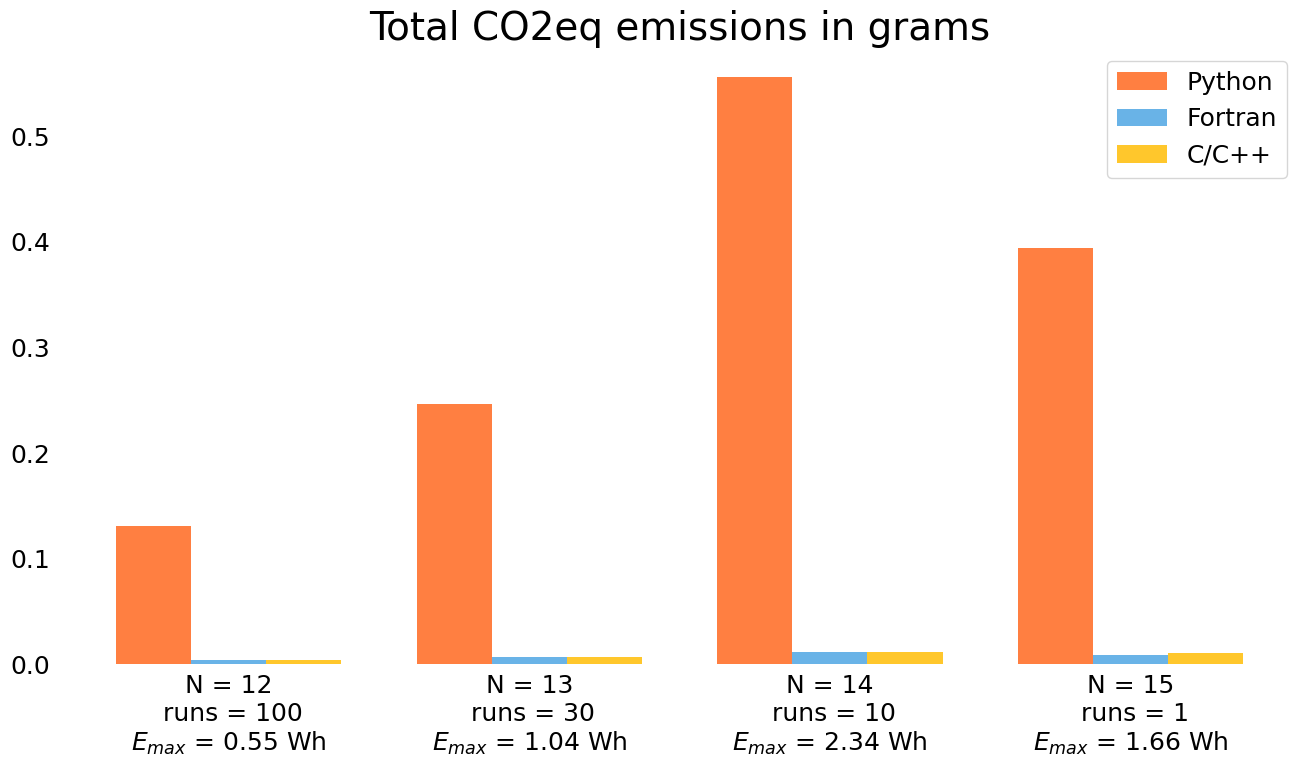

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bars
barWidth = 0.25
n_experiments = 4

# Set position of bars on horisontal axis
br1 = np.arange(n_experiments) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]

# Set bar group labels
p_energy = df_python["energy_consumed"].to_numpy() * 1000
f_energy = df_fortran["energy_consumed"].to_numpy() * 1000
c_energy = df_c["energy_consumed"].to_numpy() * 1000
experiment_labels = [
    "N = 12\n runs = 100\n" + "$E_{max}$ = " + str(round(max(p_energy[0], f_energy[0], c_energy[0]), 2)) + " Wh",
    "N = 13\n runs = 30\n" + "$E_{max}$ = " + str(round(max(p_energy[1], f_energy[1], c_energy[1]), 2)) + " Wh",
    "N = 14\n runs = 10\n" + "$E_{max}$ = " + str(round(max(p_energy[2], f_energy[2], c_energy[2]), 2)) + " Wh",
    "N = 15\n runs = 1\n" + "$E_{max}$ = " + str(round(max(p_energy[3], f_energy[3], c_energy[3]), 2)) + " Wh",
]

#
# Make total emissions plot
#
# set height of bars
p_emissions = df_python["emissions"].to_numpy() * 1000
f_emissions = df_fortran["emissions"].to_numpy() * 1000
c_emissions = df_c["emissions"].to_numpy() * 1000

# colour_index
col_idx = 6

# Create the plot
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
plt.bar(br1, p_emissions, color = colours_contrast[col_idx], width = barWidth, label = 'Python') 
plt.bar(br2, f_emissions, color = colours_contrast[col_idx + 1], width = barWidth, label = 'Fortran') 
plt.bar(br3, c_emissions, color = colours_contrast[col_idx + 2], width = barWidth, label = 'C/C++') 

# Hide the right and top spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Plot labels
plt.title('Total CO2eq emissions in grams', fontsize = 28) 
plt.xticks([r + barWidth for r in range(len(experiment_labels))], experiment_labels)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(left = False)
plt.tick_params(bottom = False)

plt.legend(fontsize=18)
plt.savefig("emissions.png")
#plt.show() 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bars
barWidth = 0.25
n_experiments = 4

# Set position of bars on horisontal axis
br1 = np.arange(n_experiments) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]

# Set bar group labels
p_energy = df_python["energy_consumed"].to_numpy() * 1000
f_energy = df_fortran["energy_consumed"].to_numpy() * 1000
c_energy = df_c["energy_consumed"].to_numpy() * 1000
experiment_labels = [
    "N = 12\n runs = 100\n" + "$E_{max}$ = " + str(round(max(p_energy[0], f_energy[0], c_energy[0]), 2)) + " Wh",
    "N = 13\n runs = 30\n" + "$E_{max}$ = " + str(round(max(p_energy[1], f_energy[1], c_energy[1]), 2)) + " Wh",
    "N = 14\n runs = 10\n" + "$E_{max}$ = " + str(round(max(p_energy[2], f_energy[2], c_energy[2]), 2)) + " Wh",
    "N = 15\n runs = 1\n" + "$E_{max}$ = " + str(round(max(p_energy[3], f_energy[3], c_energy[3]), 2)) + " Wh",
]

#
# Make total ratio of RAM to CPU energy usage plot
#
# set height of bars
p_emissions = df_python["cpu_energy"].to_numpy() / df_python["ram_energy"].to_numpy()
f_emissions = df_fortran["cpu_energy"].to_numpy() / df_fortran["ram_energy"].to_numpy()
c_emissions = df_c["cpu_energy"].to_numpy() / df_c["ram_energy"].to_numpy()

# colour_index
col_idx = 6

# Create the plot
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
plt.bar(br1, p_emissions, color = colours_contrast[col_idx], width = barWidth, label = 'Python') 
plt.bar(br2, f_emissions, color = colours_contrast[col_idx + 1], width = barWidth, label = 'Fortran') 
plt.bar(br3, c_emissions, color = colours_contrast[col_idx + 2], width = barWidth, label = 'C/C++') 

# Hide the right and top spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# set vertical axis limits
ax.set_ylim([0, 3])

# Plot labels
plt.title('Ratio of RAM to CPU energy usage', fontsize = 28)
plt.xticks([r + barWidth for r in range(len(experiment_labels))], experiment_labels)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(left = False)
plt.tick_params(bottom = False)

plt.legend(fontsize=18)
plt.savefig("cpu_to_ram.png")
#plt.show() 